# Data-Driven Nutritional Beverage Recommendation System

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

To achieve the objective of (identifying healthier beverage choices and understanding caffeine profiles), this project utilizes two distinct datasets.

**Primary Dataset: starbucks.csv (sb)**

This comprehensive dataset provides a detailed breakdown of the nutritional profiles for various Starbucks menu items.

In [375]:
sb = pd.read_csv('/Users/allisonxu/OneDrive/DS_Projects/Starbucks_analyze/starbucks.csv')
sb.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [376]:
sb.columns = sb.columns.str.strip()
sb.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

* 'Beverage_category' column classifies the type of beverage, such as coffee, tea, or smoothie.
* 'Beverage' column provides the specific name of the drink, for instance, Caramel Macchiato or Green Tea Latte.
* 'Beverage_prep' column details the preparation method of the beverage, including whether it's served hot or cold, and any additional ingredients or toppings like whipped cream or syrup.
* 'Calories' column lists the total caloric content of each beverage.
* 'Total Fat (g)', 'Trans Fat (g)', and 'Saturated Fat (g)', provide a breakdown of the fat content in each beverage. The 'Sodium (mg)' column indicates the amount of sodium in each beverage.
* 'Total Carbohydrates (g)' column provides the total carbohydrate content, including sugars, which is particularly useful for people managing diabetes or following a low-carb diet.
* 'Cholesterol (mg)' column lists the amount of cholesterol in each beverage.

**Supplementary Dataset: caffeine.csv (caffeine)**

A secondary, more targeted dataset is introduced specifically for the second phase of the project. This dataset focuses exclusively on the Caffeine Content of various popular commercial beverages.

In [377]:
caffeine = pd.read_csv('/Users/allisonxu/OneDrive/DS_Projects/Starbucks_analyze/caffeine.csv')
caffeine.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


# Task 0: A closer look. 

**Data Cleaning**

In [378]:
sb.isna().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

There exists one and only one empty value in the data frame, which appears in the 'Caffeine' column. Because the amount of null values is small, we drop that value. 

In [379]:
sb = sb.dropna()

In [380]:
sb.dtypes

Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)               object
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

The 'Total Fat (g)' and 'Caffeine (mg)' appears to be abnormal because the expected datatypes are float or int. 

In [381]:
print(sb['Total Fat (g)'].unique())
sb['Total Fat (g)'] = sb['Total Fat (g)'].str.replace('3 2', '3.2')
sb['Total Fat (g)'] = sb['Total Fat (g)'].astype('float')

print(sb['Caffeine (mg)'].unique())
sb['Caffeine (mg)'] = sb['Caffeine (mg)'].str.lower().replace('varies', 'NaN')
sb =sb.dropna(subset=['Caffeine (mg)'])
sb['Caffeine (mg)'] = sb['Caffeine (mg)'].astype('float')
sb.dtypes

['0.1' '3.5' '2.5' '0.2' '6' '4.5' '0.3' '7' '5' '0.4' '9' '1.5' '4' '2'
 '8' '3' '11' '0' '1' '10' '15' '13' '0.5' '3 2']
['175' '260' '330' '410' '75' '150' '85' '95' '180' '225' '300' '10' '20'
 '25' '30' '0' 'Varies' '50' '70' '120' '55' '80' '110' 'varies' '165'
 '235' '90' '125' '170' '15' '130' '140' '100' '145' '65' '105']


Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)              float64
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)              float64
dtype: object

**First, consider the Calories of each beverage.**

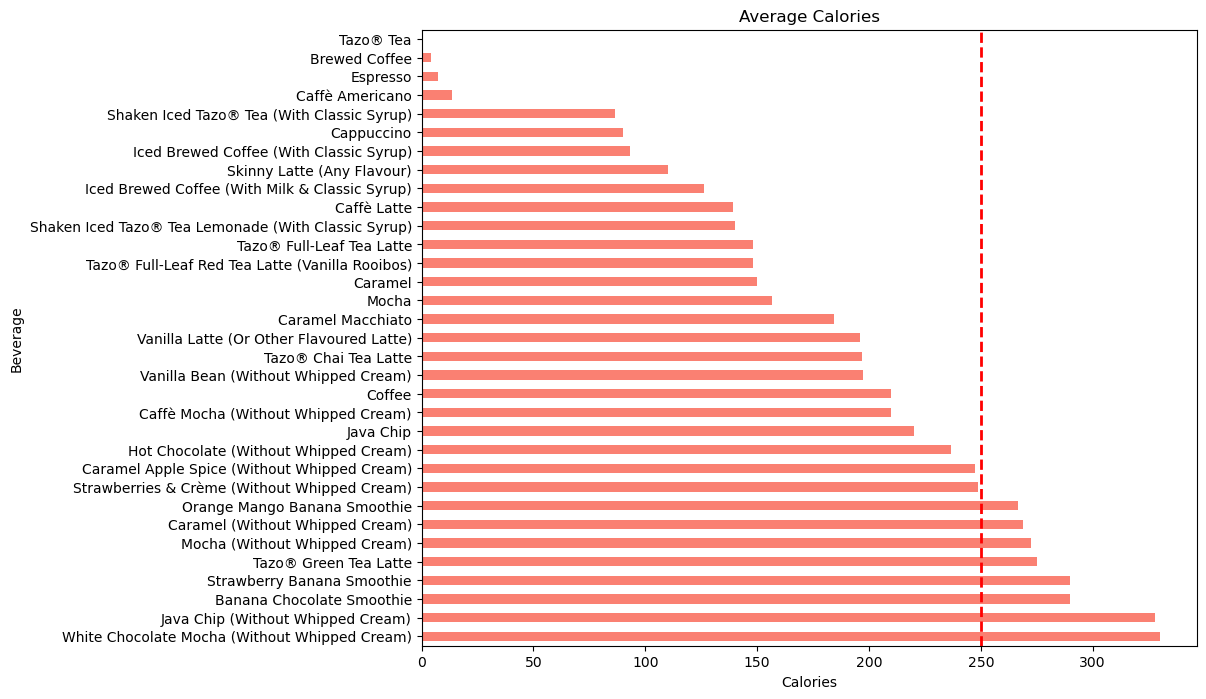

In [382]:
avg_cal_beverage = sb.groupby('Beverage')['Calories'].mean()
avg_cal_beverage = avg_cal_beverage.sort_values(ascending=False)

avg_cal_beverage.plot(kind='barh', figsize=(10,8), color = '#FA8072')

plt.title('Average Calories')
plt.xlabel('Calories')
plt.ylabel('Beverage')

plt.axvline(x=250, color='red', linestyle='--', linewidth=2, label='250 Cal Threshold')

plt.show()

In our dataset, most beverages are under 250 calories. However, there are 8 beverages have calories higher than 250, namely: <br> 
- Orange Mango Banana Smoothie
- Caramel (Without Whipped Cream)
- Mocha (Without Whipped Cream)
- Tazo Green Tea Latte
- Strawberry Banana Smoothie
- Banana Chocolate Smoothie
- Java Chip (Without Whipped Cream)
- White Chocolate Mocha (Without Whipped Cream)

**Second, consider the caffeine contained in each beverage.**

According to American Medical Association, less than 400 milligrams of caffeine per day as safe.
[AMA Health](https://www.ama-assn.org/public-health/prevention-wellness/what-doctors-wish-patients-knew-about-impact-caffeine#:~:text=%E2%80%9CThe%20Food%20and%20Drug%20Administration,Clark.)

In [383]:
sb[sb.get('Caffeine (mg)') >= 400]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0


All drinks have a healthy caffeine content, except for Venti Brewed Coffee. 

**Third, exploring the 'Beverage_prep' column.**

In [384]:
sb['Beverage_prep'].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

This column contains information about milk categories and cup size for beverages without milk. 

---

# Task 1: Calorie-Normalized Macronutrient Efficiency Analysis
### Identifying nutritionally favorable beverages under sugar–protein trade-offs.

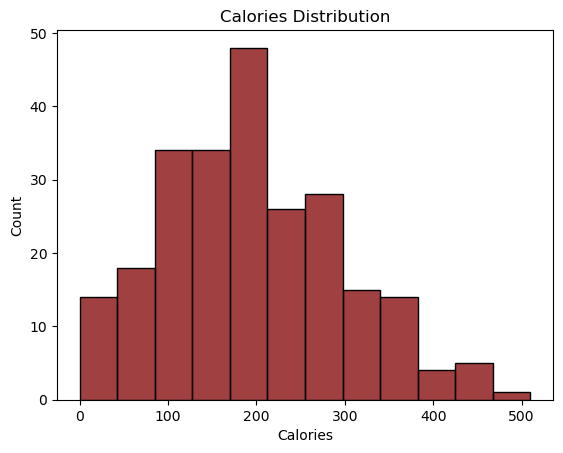

In [385]:
sns.histplot(sb, x = "Calories", color = '#800000').set_title('Calories Distribution')
plt.show()

In the box plot below, we mark beverages with higher maximum calorie content in darker red.

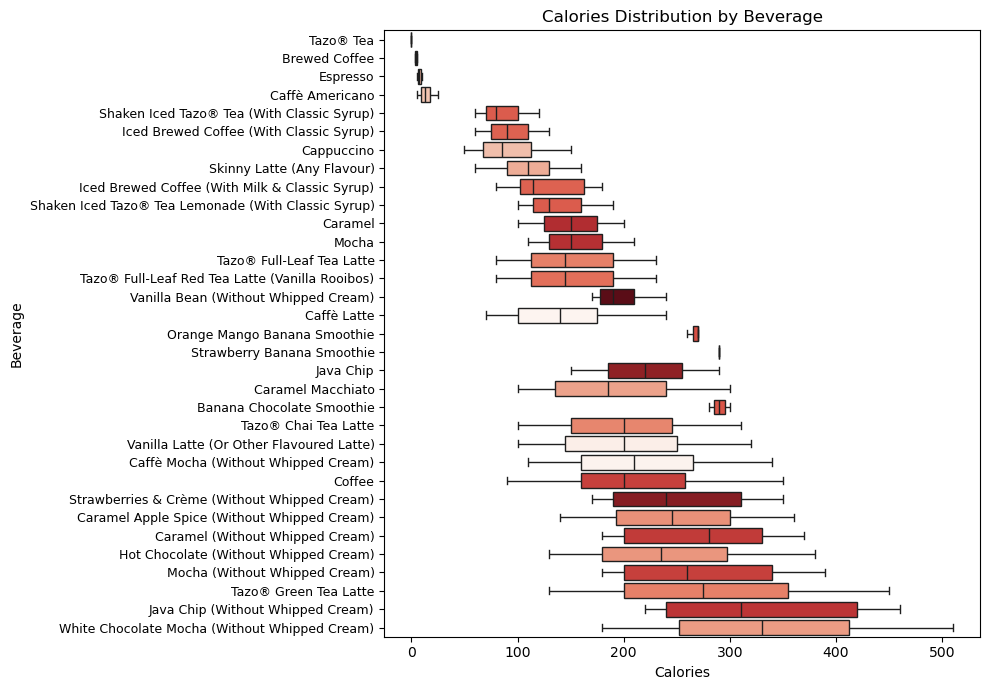

In [386]:
max_cal = sb.groupby("Beverage")["Calories"].max()

order = max_cal.sort_values().index

norm = plt.Normalize(max_cal.min(), max_cal.max())
colors = plt.cm.Reds(norm(max_cal[order])).tolist()

plt.figure(figsize=(10, 7))


sns.boxplot(
    sb,
    x = "Calories",
    y = "Beverage",
    hue = 'Beverage',
    order = order,
    palette = colors, 
)

plt.yticks(fontsize=9)

plt.title("Calories Distribution by Beverage")
plt.tight_layout()
plt.show()

The calorie distribution exhibits a clear hierarchical structure.<br>
Base beverages such as brewed coffee and espresso maintain negligible caloric density with minimal variance.<br>
In contrast, flavored and blended beverages demonstrate both significantly higher medians and expanded interquartile ranges, indicating that portion size and added ingredients are the primary drivers of caloric inflation.

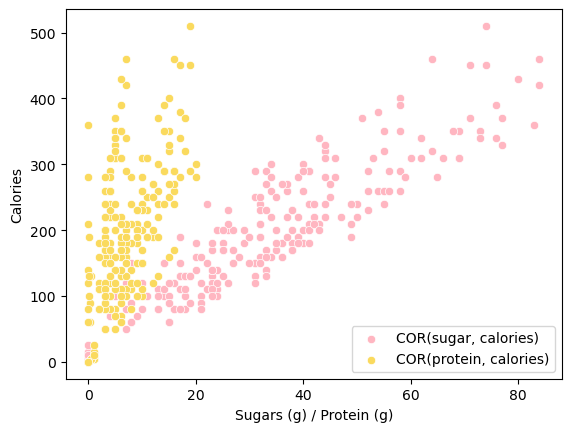

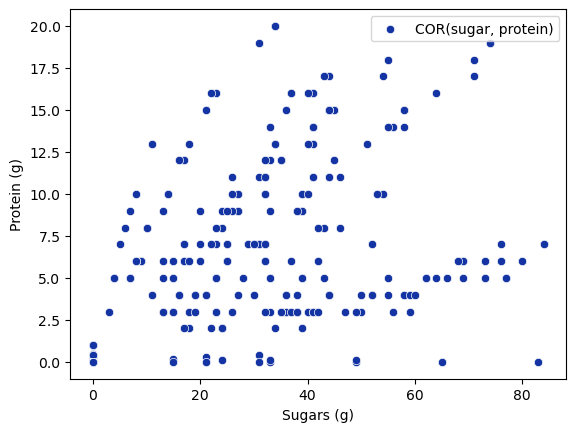

In [387]:
sns.scatterplot(sb, x = 'Sugars (g)', y = 'Calories', color = '#FFB6C1', label = 'COR(sugar, calories)')
sns.scatterplot(sb, x = 'Protein (g)', y = 'Calories', color = '#FADA5E', label = 'COR(protein, calories)')
plt.xlabel('Sugars (g) / Protein (g)')
plt.show()

sns.scatterplot(sb, x = 'Sugars (g)', y = 'Protein (g)', color = '#1434A4', label = 'COR(sugar, protein)')
plt.show()

The strong linear association between sugar and calories suggests that sugar is the primary driver of caloric variation across beverages. In contrast, protein exhibits substantially weaker association, indicating that caloric escalation is predominantly driven by added sugars rather than macronutrient-balanced composition.

Given the same number of calories, we choose the one with more protein and less sugar.

To compare the protein and sugar contained in a beverage, we use protein density and sugar density to measure the amount of two nutrients per calorie. [GRIFFIN FIT](https://www.griffinfit.co.uk/protein-density/)

We devide the scatter plot into four quadrants, where the upper left region represents beverages with less sugar and more protein, generally considered as healthier choices; and the lower right region represents beverages with more sugar but less protein, and therefore, less healthy. 

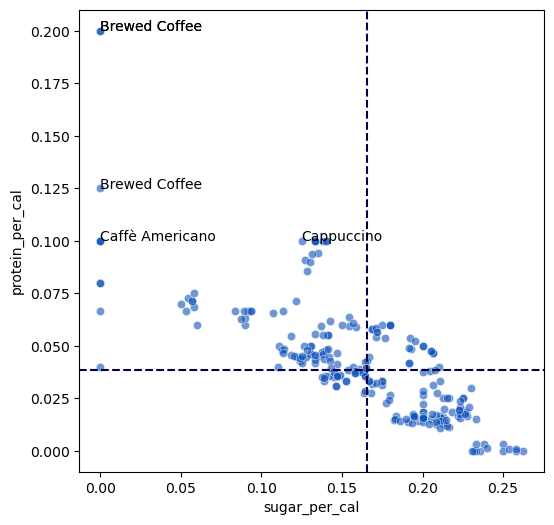

The following beverages exhibit lower sugar density and higher protein density relative to the median thresholds, indicating a more favorable macronutrient composition under a calorie-normalized framework:: Brewed Coffee, Espresso, Caffè Americano, Cappuccino, Skinny Latte (Any Flavour), Caffè Latte, Caramel Macchiato, Vanilla Latte (Or Other Flavoured Latte), Caffè Mocha (Without Whipped Cream), Tazo® Green Tea Latte, Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos), Tazo® Full-Leaf Tea Latte, Hot Chocolate (Without Whipped Cream), Orange Mango Banana Smoothie, Banana Chocolate Smoothie, Strawberry Banana Smoothie, White Chocolate Mocha (Without Whipped Cream).

In contrast, the beverages listed below occupy the high-sugar, low-protein region of the feature space.Under a calorie-normalized comparison, these items demonstrate disproportionately high sugar intensity relative to their protein contribution: Shaken Iced Tazo® Tea (With Classic Syrup), Tazo® Full-Leaf Red Tea Latte (Vanilla 

In [388]:
sb["protein_per_cal"] = sb["Protein (g)"] / sb["Calories"]
sb["sugar_per_cal"] = sb["Sugars (g)"] / sb["Calories"]

plt.figure(figsize=(6,6))

sns.scatterplot(
    sb,
    x = 'sugar_per_cal',
    y = 'protein_per_cal', 
    color = '#0F52BA', 
    alpha = 0.6
)

x_med = sb["sugar_per_cal"].median()
y_med = sb["protein_per_cal"].median()
plt.axvline(x=x_med, linestyle="--", color = '#000047')
plt.axhline(y=y_med, linestyle="--", color = '#000047')

healthy = sb[
    (sb["sugar_per_cal"] < x_med) &
    (sb["protein_per_cal"] > y_med)
]

top5 = healthy.sort_values(
    "protein_per_cal", ascending=False
).head(5)

for _, row in top5.iterrows():
    plt.text(
        row["sugar_per_cal"],
        row["protein_per_cal"],
        row["Beverage"],
        fontsize = 10
    )

unhealthy = sb[
    (sb["sugar_per_cal"] > x_med) &
    (sb["protein_per_cal"] < y_med)
]

plt.show()

healthy_beverage = list(healthy.groupby('Beverage')['Calories'].mean().sort_values().index)
beverages_str = ", ".join(healthy_beverage)
print(f'The following beverages exhibit lower sugar density and higher protein density relative to the median thresholds, \
indicating a more favorable macronutrient composition under a calorie-normalized framework:: {beverages_str}.\n')

unhealthy_beverage = list(unhealthy.groupby('Beverage')['Calories'].mean().sort_values().index)
un_beverages_str = ", ".join(unhealthy_beverage)
print(f'In contrast, the beverages listed below occupy the high-sugar, low-protein region of the feature space.\
Under a calorie-normalized comparison, these items demonstrate disproportionately high sugar intensity \
relative to their protein contribution: {un_beverages_str}.')

----

# Task 2: Variability Analysis of Caffeine Content Across Beverage Categories

In [389]:
sb.groupby('Beverage_category')['Caffeine (mg)'].mean()

Beverage_category
Classic Espresso Drinks              122.068966
Coffee                               293.750000
Frappuccino® Blended Coffee          101.805556
Frappuccino® Blended Crème             0.000000
Frappuccino® Light Blended Coffee     99.583333
Shaken Iced Beverages                139.583333
Signature Espresso Drinks             73.875000
Smoothies                              5.625000
Tazo® Tea Drinks                      50.416667
Name: Caffeine (mg), dtype: float64

In [390]:
sb.groupby(['Beverage_category', 'Beverage'])['Caffeine (mg)'].mean()

Beverage_category                  Beverage                                           
Classic Espresso Drinks            Caffè Americano                                        187.500000
                                   Caffè Latte                                            112.500000
                                   Caffè Mocha (Without Whipped Cream)                    133.750000
                                   Cappuccino                                             112.500000
                                   Espresso                                               112.500000
                                   Skinny Latte (Any Flavour)                             112.500000
                                   Vanilla Latte (Or Other Flavoured Latte)               112.500000
Coffee                             Brewed Coffee                                          293.750000
Frappuccino® Blended Coffee        Caramel (Without Whipped Cream)                        100.000000
    

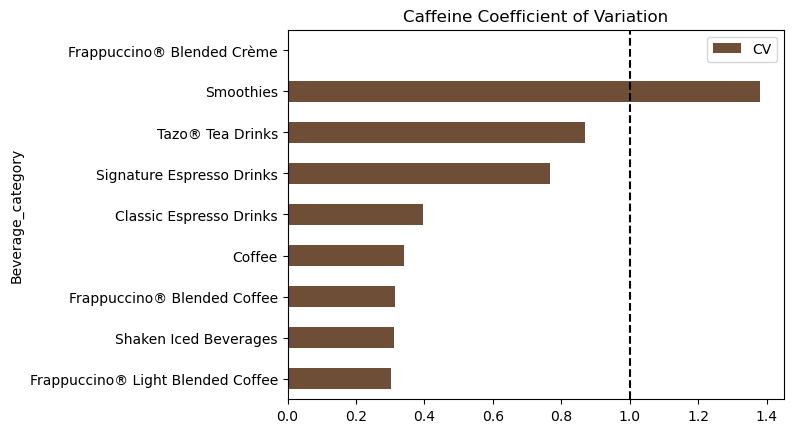

In [391]:
category_caffeine_stats = sb.groupby('Beverage_category')['Caffeine (mg)'].agg(['mean', 'std'])
category_caffeine_stats['CV'] = category_caffeine_stats['std'] / category_caffeine_stats['mean']
category_caffeine_stats.loc[category_caffeine_stats['mean'] == 0, 'CV'] = np.nan

category_caffeine_stats.sort_values('CV').plot(
    kind = 'barh', 
    y = 'CV', 
    title = 'Caffeine Coefficient of Variation', 
    color = '#6F4E37'
)

plt.axvline(x = 1, color = 'black', linestyle = '--')

plt.show()

Category with zero caffeine were excluded from CV analysis because coefficient of variation is undefined when mean equals zero. Because all beverages in the Frappuccino Blended Crème category contains no caffeine, it's CV has no meaning, and thus is excluded. 

The smoothie category exhibits the highest coefficient of variation (CV > 1.2), indicating substantial relative dispersion in caffeine content, and that caffeine content is highly unpredictable within this category.. This suggests structural heterogeneity within the category, likely driven by the coexistence of caffeine-free fruit-based smoothies and espresso-infused blended beverages.

So, why does a non-coffee beverage category exhibit the highest caffeine variability?

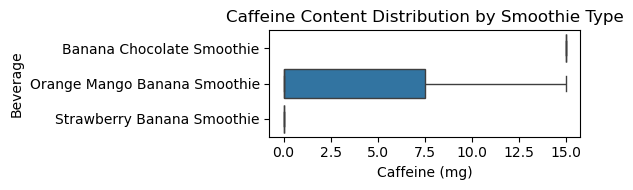

In [392]:
smoothie = sb[sb.get('Beverage_category') == 'Smoothies'].drop(columns = ['Saturated Fat (g)'])

plt.figure(figsize=(6, 2))
ax = sns.boxplot(smoothie, x='Caffeine (mg)', y='Beverage')

plt.xlabel('Caffeine (mg)')
plt.ylabel('Beverage')
plt.title('Caffeine Content Distribution by Smoothie Type')

plt.tight_layout()
plt.show()

- The observed variability is partially driven by inconsistent recording of caffeine values (NaN vs. zero), which introduces artificial dispersion if treated uniformly.
- The high coefficient of variation suggests structural heterogeneity within the smoothie category, likely reflecting the coexistence of caffeine-free fruit-based formulations and coffee-infused variants. In this scenario, the caffeine in Banana Chocolate Smoothies probably comes from the cocoa.

Thus, smoothies can be interpreted as a “hidden variability” category: although not typically perceived as caffeine-containing beverages, specific ingredient additions (e.g., cocoa) create non-trivial caffeine variation within the group.

---

# Task 3: Nutritional Impact of Milk Type Substitution

In [393]:
sb.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),protein_per_cal,sugar_per_cal
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0,0.100000,0.000000
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0,0.125000,0.000000
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0,0.200000,0.000000
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0,0.200000,0.000000
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0,0.085714,0.128571


Because some coffee do not contain any type of milk, such as Brewed Coffee, in which their 'Beverage_prep' column only contains the cup size information, and espresso, in which their 'Beverage_prep' column contains the number of shots ('Doppio' or 'Solo'), we need to exclude these rows to better analyze the nutritional impact of milk types. 

In [394]:
sb_milk = sb[sb['Beverage_prep'].apply(lambda x: x not in ['Short', 'Tall', 'Grande', 'Venti', 'Doppio', 'Solo'])]

In [395]:
print(sb_milk.dtypes)

Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)              float64
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)              float64
protein_per_cal            float64
sugar_per_cal              float64
dtype: object


We need to convert contents in the four columns (Vitamin A, Vitamin C, Calcium, Iron) from object to float. 

In [396]:
cols_to_convert = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
sb_milk.loc[:, cols_to_convert] = (sb_milk.loc[:, cols_to_convert].apply(lambda x: x.str.replace('%', '').astype(float)))

Nutrients directly derived from dairy composition (including saturated fat, cholesterol, protein, calcium, iron, and Vitamin A ([Harvard: The Nutrition Source](https://nutritionsource.hsph.harvard.edu/milk/))) are expected to exhibit systematic differences across milk types.

In [397]:
nutrients = ['Saturated Fat (g)', 'Cholesterol (mg)', 'Protein (g)', 'Vitamin A (% DV)', 'Calcium (% DV)', 'Iron (% DV)']

milk_map = {
    'Grande Nonfat Milk': 'Nonfat Milk',
    'Short Nonfat Milk': 'Nonfat Milk',
    'Tall Nonfat Milk': 'Nonfat Milk',
    'Venti Nonfat Milk': 'Nonfat Milk'
}
sb_milk['Beverage_prep'] = sb_milk['Beverage_prep'].replace(milk_map)

sb_milk_stats = sb_milk.groupby(['Beverage_prep'])[nutrients].mean().reset_index()
sb_milk_stats

/var/folders/0l/nv2w_zqn0rncbhxnnml3xmdw0000gn/T/ipykernel_9848/139533124.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_milk['Beverage_prep'] = sb_milk['Beverage_prep'].replace(milk_map)


,Beverage_prep,Saturated Fat (g),Cholesterol (mg),Protein (g),Vitamin A (% DV),Calcium (% DV),Iron (% DV)
0,2% Milk,0.146939,34.428571,9.775510,14.081633,27.510204,4.653061
1,Nonfat Milk,0.000000,38.349398,7.975904,12.46988,22.650602,5.855422
2,Soymilk,0.000000,36.333333,7.121212,8.575758,24.151515,14.606061
3,Whole Milk,0.118750,57.687500,4.187500,5.375,11.6875,7.375


We use Min-max scaling to normalize all nutritients. Nutrients associated with cardiovascular risk (saturated fat and cholesterol) were reverse-scaled to ensure that higher normalized values consistently reflect better health outcomes across all dimensions.

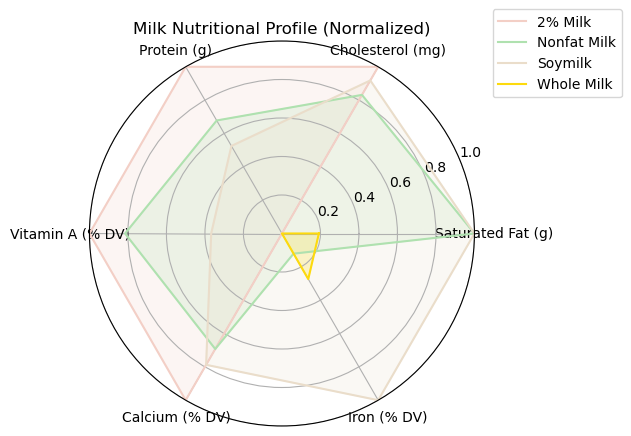

,Beverage_prep,Saturated Fat (g),Cholesterol (mg),Protein (g),Vitamin A (% DV),Calcium (% DV),Iron (% DV)
0,2% Milk,0.00000,1.000000,1.000000,1.0,1.0,0.0
1,Nonfat Milk,1.00000,0.831427,0.677952,0.814882,0.692872,0.120804
2,Soymilk,1.00000,0.918106,0.525001,0.367623,0.78773,1.0
3,Whole Milk,0.19184,0.000000,0.000000,0.0,0.0,0.273479


In [398]:
bad_nutrients = ['Saturated Fat (g)', 'Cholesterol (mg)']

for col in nutrients:
    min_val = sb_milk_stats[col].min()
    max_val = sb_milk_stats[col].max()
    sb_milk_stats[col] = (sb_milk_stats[col] - min_val) / (max_val - min_val)
    
    if col in bad_nutrients:
        sb_milk_stats[col] = 1 - sb_milk_stats[col]

angles = np.linspace(0, 2 * np.pi, len(nutrients), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

colors = ['#F3CFC6', '#AFE1AF', '#EADDCA', '#FDDA0D']
for i in range(len(sb_milk_stats)):
    values = sb_milk_stats.iloc[i][nutrients].values.tolist()
    values += values[:1]

    ax.plot(angles, values, label = sb_milk_stats.loc[i, 'Beverage_prep'], color = colors[i])
    ax.fill(angles, values, color = colors[i], alpha = 0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(nutrients)
ax.set_ylim(0, 1)

ax.set_title("Milk Nutritional Profile (Normalized)")
plt.legend(loc = 'upper right', bbox_to_anchor = (1.4, 1.1))
plt.show()

sb_milk_stats

The radar chart illustrates the normalized nutritional profiles of different milk preparations across six dimensions: saturated fat, cholesterol, protein, vitamin A, calcium, and iron. To ensure interpretability, saturated fat and cholesterol were reverse-scaled so that higher normalized values consistently represent more favorable health outcomes.<br><br>
Several patterns emerge from the visualization：
* First, plant-based alternatives such as Soymilk demonstrate a more balanced nutritional structure, particularly characterized by low saturated fat and cholesterol levels and relatively strong iron content. This suggests potential cardiovascular advantages compared to dairy-based alternatives.
* In contrast, Whole Milk exhibits comparatively lower scores in the reversed saturated fat and cholesterol dimensions, indicating a less favorable lipid profile. Although it provides certain micronutrients, its overall health profile appears constrained by higher fat-related risk factors.
* Additionally, iron content appears to vary substantially across milk types, with plant-based options contributing higher values relative to dairy-based alternatives. This highlights structural nutritional differences beyond macronutrient composition.

In [399]:
sb_milk.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)', 'protein_per_cal',
       'sugar_per_cal'],
      dtype='object')

To further investigate the "healthiest" milk choices, we need a comprehensive nutritional score, weighted based on authoritative nutritional guidelines. Here, the score is calculated using the [NRF(Nutrient Rich Food Index)](https://www.sciencedirect.com/science/article/pii/S0002916523017847) algorithm, where positive nutrients (Protein, Fiber, Vitamins, Minerals) are normalized by their Daily Values (DV), and limiting nutrients (Sugars, Saturated Fats, etc.) are penalized based on their Upper Limits (UL).

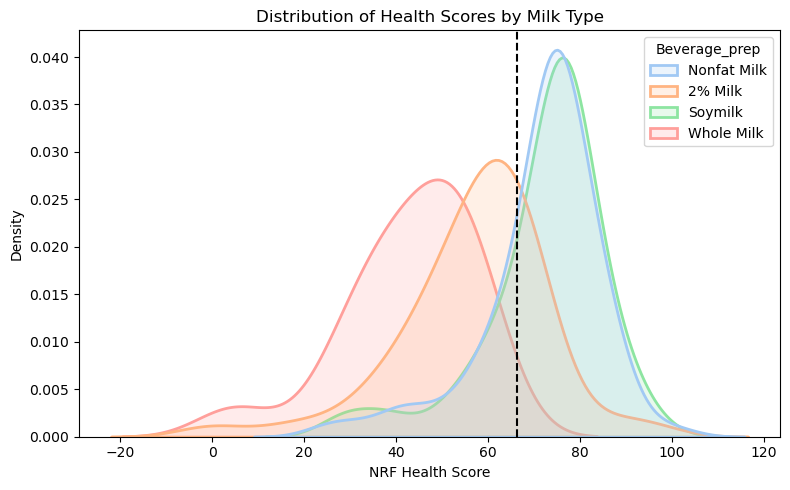

In [400]:
def nrf_score(row):
    pos = (row['Protein (g)']/50 + row['Dietary Fibre (g)']/25 + row['Vitamin A (% DV)']/100 + 
           row['Vitamin C (% DV)']/100 + row['Calcium (% DV)']/100 + row['Iron (% DV)']/100)
    
    neg = (row['Sugars (g)']/50 + row['Saturated Fat (g)']/20 + row['Sodium (mg)']/2300 + 
           row['Cholesterol (mg)']/300 + row['Trans Fat (g)']/2) 
    
    return (pos - neg) * 100

scores = sb_milk.apply(nrf_score, axis=1)
sb_milk_scores = pd.DataFrame().assign(Beverage_prep = sb_milk['Beverage_prep'], 
                                       scores = scores)

min_s = sb_milk_scores['scores'].min()
max_s = sb_milk_scores['scores'].max()
sb_milk_scores['normalized_score'] = (sb_milk_scores['scores'] - min_s) / (max_s - min_s) * 100

plt.figure(figsize=(8, 5))

ax = sns.kdeplot(
    sb_milk_scores, 
    x = 'normalized_score', 
    hue = 'Beverage_prep', 
    fill = True, 
    common_norm = False, 
    alpha = 0.2, 
    linewidth = 2,
    palette = 'pastel'
)

mean_score = sb_milk_scores['normalized_score'].mean()
plt.axvline(mean_score, color='black', linestyle='--', label = 'Average Score')

plt.title('Distribution of Health Scores by Milk Type', fontsize=12)
plt.xlabel('NRF Health Score', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

The KDE (Kernel Density Estimation) plot demonstrates a distinct nutritional stratification. While Soymilk and Nonfat Milk display a high-density peak in the 70–80 point range, Whole Milk and 2% Milk show a broader, lower-scoring distribution centered around 40–60 points. This performance gap is primarily driven by the NRF 9.3 penalty for limiting nutrients; the absence of saturated fats in Nonfat Milk and the low sugar/iron-rich profile of Soymilk contribute to their superior health indexing. This also aligns with our previous analysis over the nutritional contents derived from milk. 

---

# Task 4: Personalized Daily Intake Simulation

**Starbucks beverage recommendations based on physiological traits & dietary constraints.**

In this section, we designed a structured, assumption-aware, context-driven simulation framework for personalized nutritional optimization.

First, we calculate BMR (Basal Metabolic Rate) based on the Mifflin-st Jeor Equation. 

In [401]:
def calculate_bmr(weight, height, age, gender):
    """
    weight: kg
    height: cm
    age: years
    gender: 'male' or 'female'
    """
    assert gender in ['male', 'female']
    
    if gender == 'male':
        return 10 * weight + 6.25 * height - 5 * age + 5
    else:
        return 10 * weight + 6.25 * height - 5 * age - 161

Second, we set the caffeine daily intake limit based on age groups. <br>
[University of Michigan Caffeine Limit](https://www.michiganmedicine.org/health-lab/parents-perk-dangers-caffeine-teens)

In [402]:
def caffeine_limit(age):
    if age < 18:
        return 100
    else:
        return 400

Third, we normalize the nutrient contents with Min-Max Normalization. 

In [403]:
def min_max_scale(df, cols, reverse_cols):
    df_scaled = df.copy()
    
    for col in cols:
        min_val = df[col].min()
        max_val = df[col].max()
        
        if max_val - min_val == 0:
            df_scaled[col] = 0
        
        else:
            df_scaled[col] = (df[col] - min_val) / (max_val - min_val)
        
        if col in reverse_cols:
            df_scaled[col] = 1 - df_scaled[col]
            
    return df_scaled

In [408]:
cols_to_convert = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
sb.loc[:, cols_to_convert] = (sb_milk.loc[:, cols_to_convert].apply(lambda x: x.replace('%', '').astype(float)))

In [446]:
def recommend_beverage(user_profile, sb):

    df = sb.copy()

    # soy alergic filtering
    if user_profile['soy_allergy']:
        df = df[~df['Beverage_prep'].str.contains('Soymilk')]

    # caffeine limit based on age
    max_caffeine = caffeine_limit(user_profile['age'])
    df = df[df['Caffeine (mg)'] <= max_caffeine]

    # Calories based on BMR
    bmr = calculate_bmr(
        user_profile['weight'],
        user_profile['height'],
        user_profile['age'],
        user_profile['gender']
    )
    df = df[df['Calories'] <= bmr * 0.15]

    if len(df) == 0:
        return "No beverage meets the constraints."

    score_cols = [
        'Calories',
        'Caffeine (mg)',
        'Sugars (g)',
        'Saturated Fat (g)',
        'Cholesterol (mg)',
        'Total Carbohydrates (g)',
        'Protein (g)',
        'Dietary Fibre (g)',
        'Vitamin A (% DV)',
        'Vitamin C (% DV)',
        'Iron (% DV)',
        'Calcium (% DV)'
    ]
    
    reverse_cols = [
        'Calories',
        'Caffeine (mg)',
        'Sugars (g)',
        'Saturated Fat (g)',
        'Cholesterol (mg)'
    ]

    df_scaled = min_max_scale(df, score_cols, reverse_cols)

    # Context-aware scores
    goal = user_profile['goal']

    if goal == "weight_loss":
        weights = {
            'Calories': 0.20,
            'Sugars (g)': 0.20,
            'Total Carbohydrates (g)': 0.15,
            'Caffeine (mg)': 0.05,
            'Saturated Fat (g)': 0.10,
            'Cholesterol (mg)': 0.10,
            'Protein (g)': 0.10,
            'Dietary Fibre (g)': 0.05,
            'Vitamin A (% DV)': 0.02,
            'Vitamin C (% DV)': 0.01,
            'Iron (% DV)': 0.01,
            'Calcium (% DV)': 0.01
        }

    elif goal == "fitness":
        weights = {
            'Calories': 0.05,
            'Sugars (g)': 0.05,
            'Total Carbohydrates (g)': 0.15,
            'Caffeine (mg)': 0.10,
            'Saturated Fat (g)': 0.05,
            'Cholesterol (mg)': 0.05,
            'Protein (g)': 0.30,
            'Dietary Fibre (g)': 0.05,
            'Vitamin A (% DV)': 0.05,
            'Vitamin C (% DV)': 0.05,
            'Iron (% DV)': 0.05,
            'Calcium (% DV)': 0.05
        }

    elif goal == "cardiovascular":
        weights = {
            'Calories': 0.10,
            'Sugars (g)': 0.10,
            'Total Carbohydrates (g)': 0.05,
            'Caffeine (mg)': 0.05,
            'Saturated Fat (g)': 0.20,
            'Cholesterol (mg)': 0.20,
            'Protein (g)': 0.10,
            'Dietary Fibre (g)': 0.05,
            'Vitamin A (% DV)': 0.05,
            'Vitamin C (% DV)': 0.05,
            'Iron (% DV)': 0.025,
            'Calcium (% DV)': 0.025
        }

    else:
        # default balanced
        weights = {col: 1/len(score_cols) for col in score_cols}

    # final score
    df_scaled['Personalized Score'] = 0

    for col in score_cols:
        df_scaled['Personalized Score'] += df_scaled[col] * weights[col]

    beverages_recommended = df_scaled.groupby(['Beverage', 'Beverage_prep'])['Personalized Score']\
    .mean().reset_index().sort_values('Personalized Score', ascending = False).head(3)

    names, preps = beverages_recommended['Beverage'], beverages_recommended['Beverage_prep']
    items = [f"{b} with {p}" for b, p in zip(names, preps)]

    recommendation = f"The top three recommended beverages based on personalized information are: {items[0]}, {items[1]}, and {items[2]}."

    return recommendation

We define a structured user profile schema to simulate personalized beverage recommendations based on physiological and health-related factors.<br>

**Gender Constraint**

 - Gender is restricted to binary values: 'female' or 'male'. This simplification reflects the metabolic equation used and does not capture gender diversity.<br>

**Goal Constraint**
 
 - The health goal variable is restricted to three predefined categories:

   'weight_loss', 'fitness', 'cardiovascular'

   Each goal dynamically adjusts nutrient weights in the health scoring system

**Limitations**

 - The model does not account for total daily dietary intake.

 - Health score weights are heuristic and not clinically validated.

 - Beverage recommendations do not consider medical history beyond cardiovascular concerns.

The system returns the top three beverages with the highest personalized health scores

In [447]:
user_profile = {
    'age': 20,
    'gender': 'female',
    'weight': 44,
    'height': 166,
    'soy_allergy': False,
    'goal': 'weight_loss'
}

recommend_beverage(user_profile, sb)

'The top three recommended beverages based on personalized information are: Cappuccino with Soymilk, Caffè Latte with Soymilk, and Skinny Latte (Any Flavour) with Short Nonfat Milk.'